In [7]:
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

In [12]:
def make_cwnd_rtt(input1, input2, file_name):
    with open(file_name) as f:
        content = f.readlines()
    splitter = lambda x: x[:-1].split()
    split_input = list(map(splitter, content))
    time = list(map(lambda x: x[0], split_input))
    new_input1 = list(map(lambda x: x[1], split_input))
    new_input2 = list(map(lambda x: x[2], split_input))
    
    input1 = [float(x) + float(y) for x, y in zip(input1, new_input1)]
    input2 = [float(x) + float(y) for x, y in zip(input2, new_input2)]
    
    return input1, input2

In [23]:
time = list(np.arange(0.0, 99, 1))

def get_packet_loss(lost_packets, packets):
    packet_loss = []
    j, k = 0 ,0
    prev_i = 0
    for i in np.arange(0.0, 100.0, 1):
        lost_num = 0
        packets_num = 0
        while(j < len(lost_packets) and lost_packets[j] < i):
            lost_num += 1
            j += 1
        while(k < len(packets) and packets[k] < i):
            packets_num += 1
            k += 1
        if(packets_num):
            packet_loss.append(lost_num/packets_num)
#         prev_i = i
    return packet_loss
packet_loss1 = get_packet_loss(drop_1, packet_1)
packet_loss2 = get_packet_loss(drop_2, packet_2)

In [32]:
def sum_packet_loss(prev_packet_loss1, prev_packet_loss2):
    filename = 'trace.tr'
    with open(filename) as f:
        content = f.readlines()
    split_drop = list(map(lambda x: x[:-1].split(), content))
    drop_data = list(map(lambda x: x if 'd' in x else None, split_drop))
    drop_data = list(filter((None).__ne__, drop_data))

    drop_1 = list(map(lambda x: float(x[1]) if x[7] == '0' else None, drop_data))
    drop_1 = list(filter((None).__ne__, drop_1))

    drop_2 = list(map(lambda x: float(x[1]) if x[7] == '1' else None, drop_data))
    drop_2 = list(filter((None).__ne__, drop_2))

    print(len(drop_1))
    print(len(drop_2))
    
    split_packet = list(map(lambda x: x[:-1].split(), content))
    packet_data = list(map(lambda x: x if '+' in x else None, split_packet))
    packet_data = list(filter((None).__ne__, packet_data))

    packet_1 = list(map(lambda x: float(x[1]) if x[2] == '0' and x[3] == '2' else None, packet_data))
    packet_1 = list(filter((None).__ne__, packet_1))

    packet_2 = list(map(lambda x: float(x[1]) if x[2] == '1' and x[3] == '2' else None, packet_data))
    packet_2 = list(filter((None).__ne__, packet_2))

    print(len(packet_1))
    print(len(packet_2))
    
    packet_loss1 = get_packet_loss(drop_1, packet_1)
    packet_loss2 = get_packet_loss(drop_2, packet_2)
    
    return [sum(x) for x in zip(packet_loss1, prev_packet_loss1)], [sum(x) for x in zip(packet_loss2, prev_packet_loss2)]

In [34]:
time_length = 100
time_step = 0.1
inverse_time_step = 10

cwnd1 = [0] * time_length * inverse_time_step
cwnd2 = [0] * time_length * inverse_time_step
rtt1 = [0] * time_length * inverse_time_step
rtt2 = [0] * time_length * inverse_time_step
packet_loss1 = [0] * time_length 
packet_loss2 = [0] * time_length 

for i in range(10):
    os.system('ns simulation.tcl')
    
    cwnd1, cwnd2 = make_cwnd_rtt(cwnd1, cwnd2, 'cwnd')
    rtt1, rtt2 = make_cwnd_rtt(rtt1, rtt2, 'rtt')
    packet_loss1, packet_loss2 = sum_packet_loss(packet_loss1, packet_loss2)

cwnd1 = [x / 10 for x in cwnd1]    
cwnd2 = [x / 10 for x in cwnd2]
rtt1 = [x / 10 for x in rtt1]    
rtt2 = [x / 10 for x in rtt2]
packet_loss1 = [x/10 for x in packet_loss1]
packet_loss2 = [x/10 for x in packet_loss2]

27
26
655
659
27
26
655
659
27
26
655
659
27
26
655
659
27
26
655
659
27
26
655
659
26
27
675
636
27
26
655
659
27
26
655
659
26
27
675
636


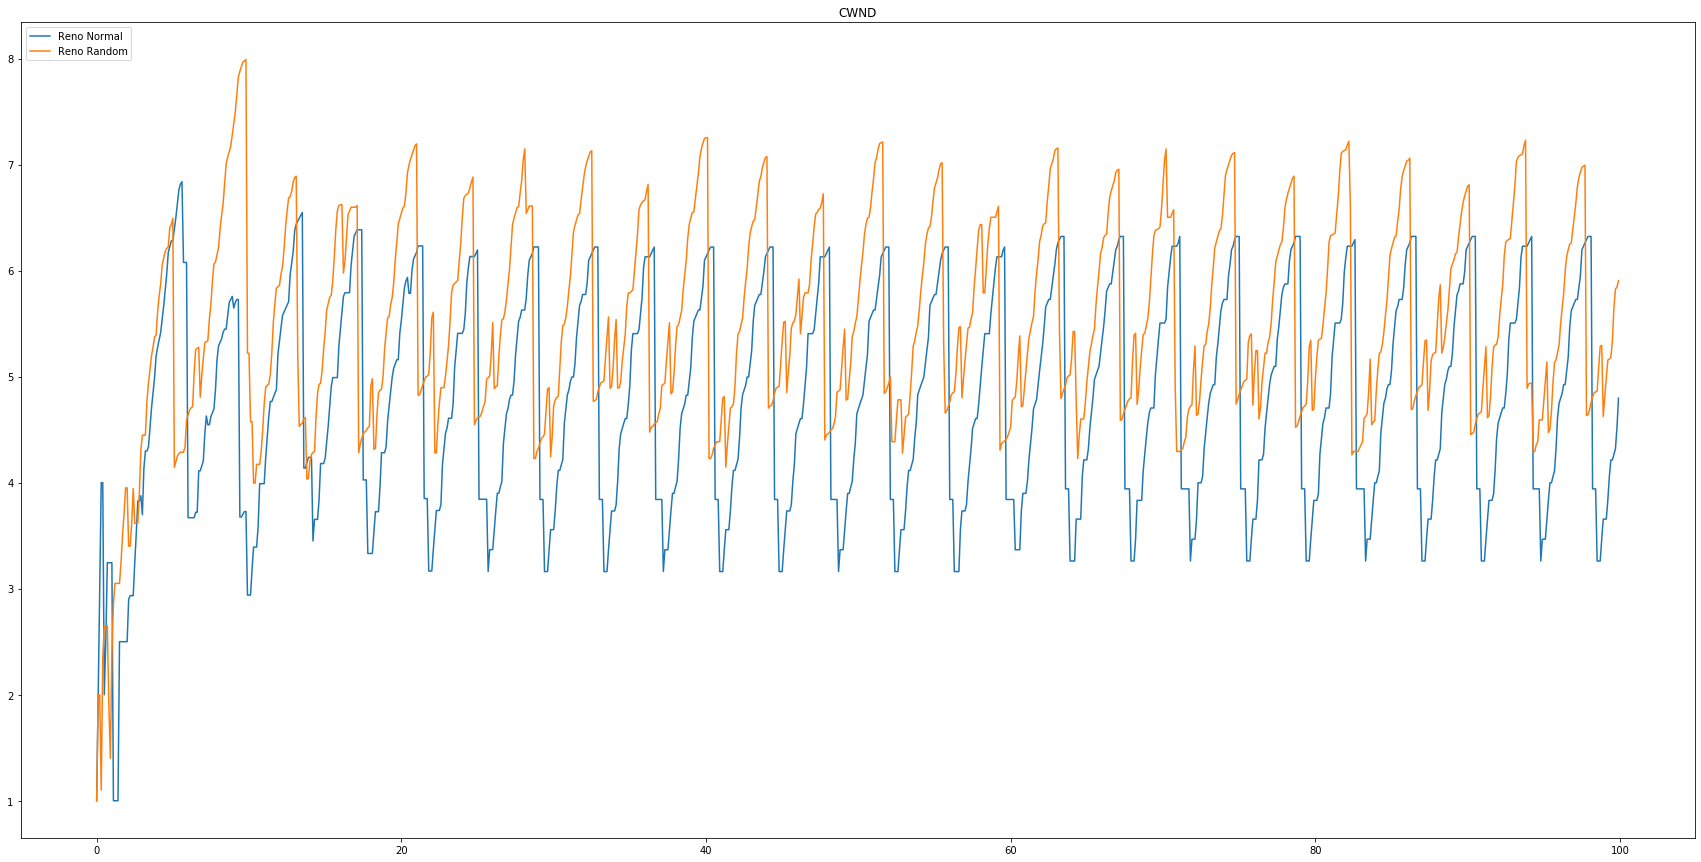

In [17]:
plt.figure(figsize=(30,15))
plt.plot(np.arange(0, time_length, 0.1), cwnd1)
plt.plot(np.arange(0, time_length, 0.1), cwnd2)
plt.legend(['Reno Normal', 'Reno Random'], loc='upper left')
plt.title('CWND')
plt.show()

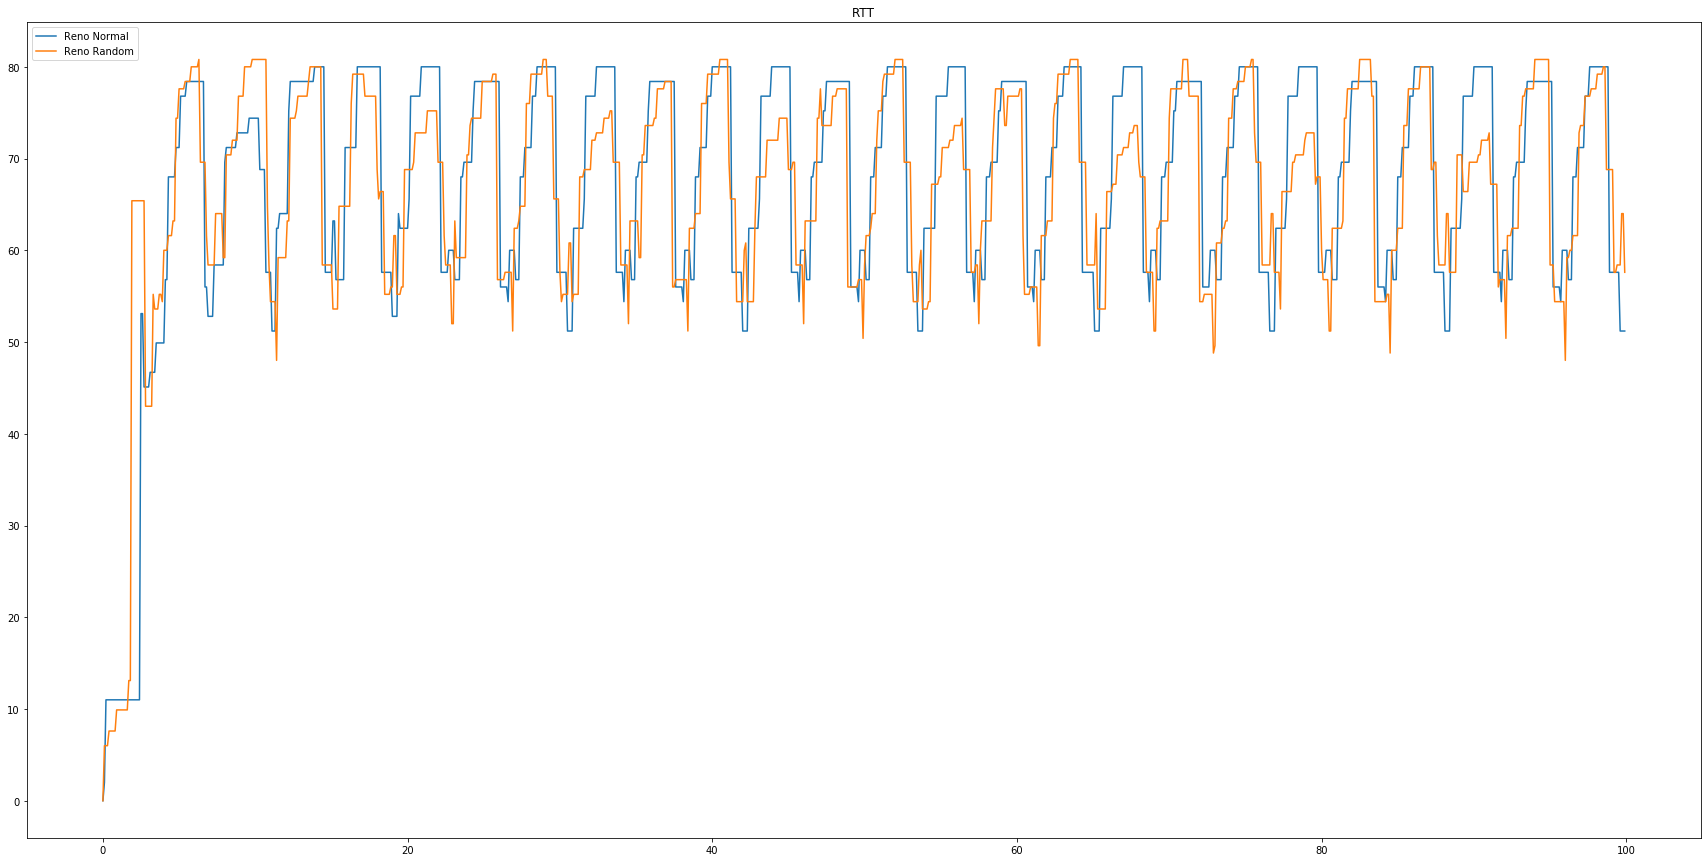

In [20]:
plt.figure(figsize=(30,15))
plt.plot(np.arange(0, time_length, 0.1), rtt1)
plt.plot(np.arange(0, time_length, 0.1), rtt2)
plt.legend(['Reno Normal', 'Reno Random'], loc='upper left')
plt.title('RTT')
plt.show()

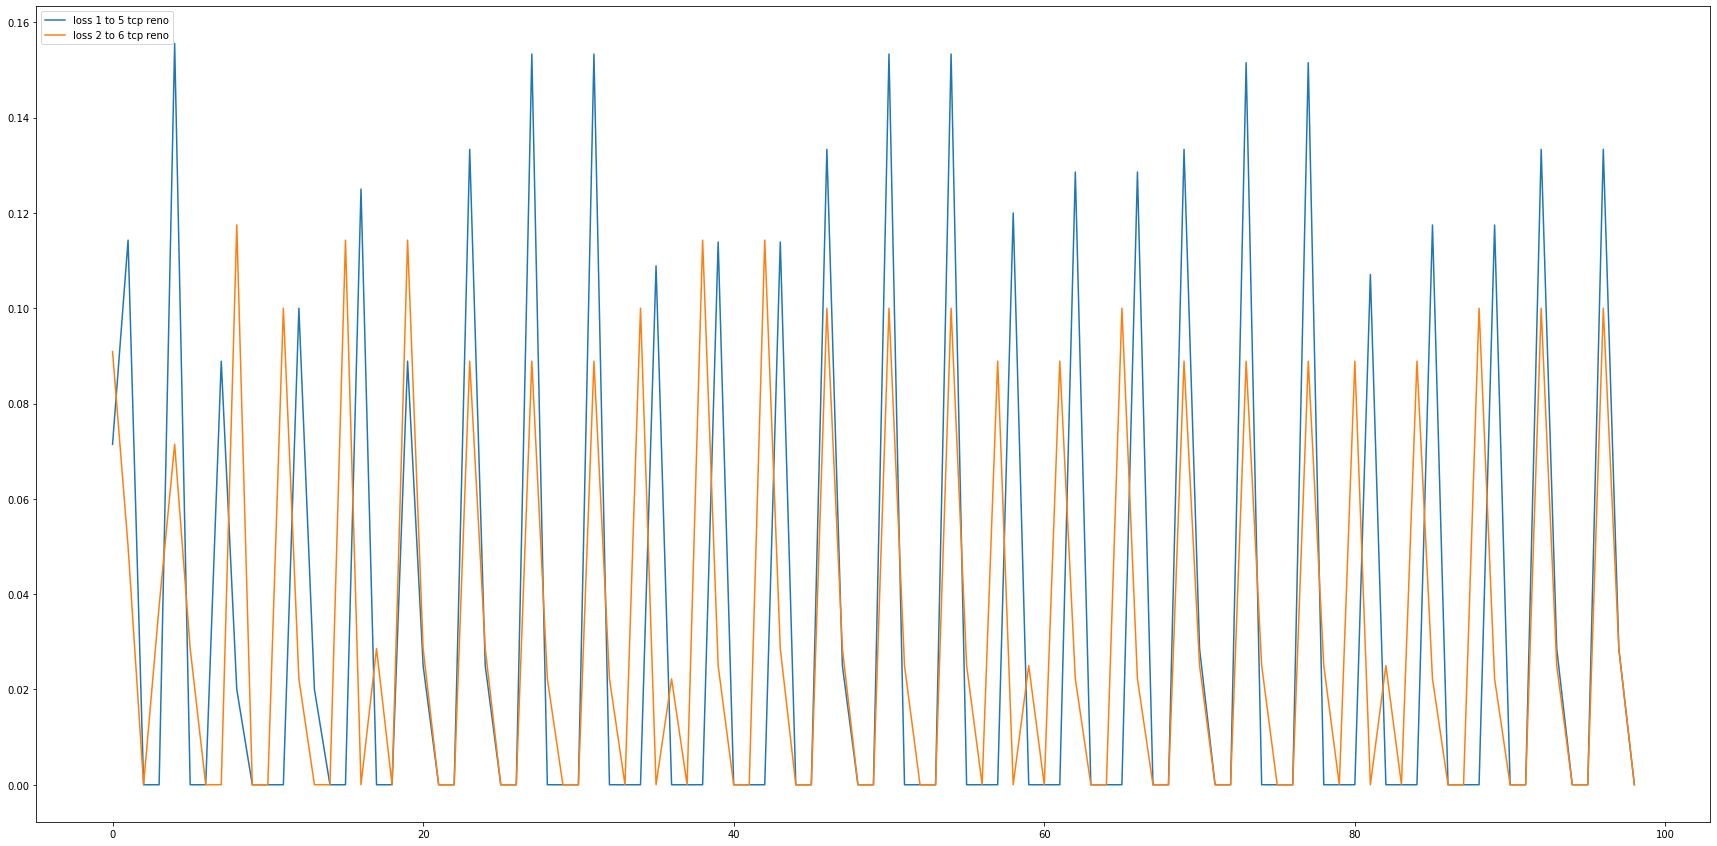

In [37]:
plt.figure(figsize=(30,15))
plt.plot(np.arange(time_length-1), packet_loss1)
plt.plot(np.arange(time_length-1), packet_loss2)
plt.legend(['loss 1 to 5 tcp reno', 'loss 2 to 6 tcp reno'], loc='upper left')
plt.show()
# len(packet_loss2)

In [10]:
filename = 'trace.tr'
with open(filename) as f:
    content = f.readlines()
split_received = list(map(lambda x: x[:-1].split(), content))
received_data = list(map(lambda x: x if x[0] == 'r' else None, split_received))
received_data = list(filter((None).__ne__, received_data))

received_1 = list(map(lambda x: float(x[1]) if x[2] == '3' and x[3] == '4' else None, received_data))
received_1 = list(filter((None).__ne__, received_1))

received_2 = list(map(lambda x: float(x[1]) if x[2] == '3' and x[3] == '5' else None, received_data))
received_2 = list(filter((None).__ne__, received_2))

# print((received_1))

In [11]:
def get_goodput(received, loss):
    goodput = list()
    received_idx = 0
    loss_idx = 0
    loss_ended = False

    for t in range(1, 101):
        t_goodput = 0
        while (not loss_ended) and (loss_idx < len(loss) and loss[loss_idx] < t - 1):
            loss_idx += 1
        if loss_idx == len(loss) and received[received_idx] >= loss[loss_idx-1]:
            loss_ended = True
            loss_idx -= 1
            
        while received_idx < len(received) and received[received_idx] < t - 1:
            received_idx += 1
            
        while received_idx < len(received) and (loss_ended or received[received_idx] < loss[loss_idx]) and received[received_idx] < t :
            t_goodput += 1
            received_idx += 1
        goodput.append(t_goodput * 1000 * 8)
        
    return goodput

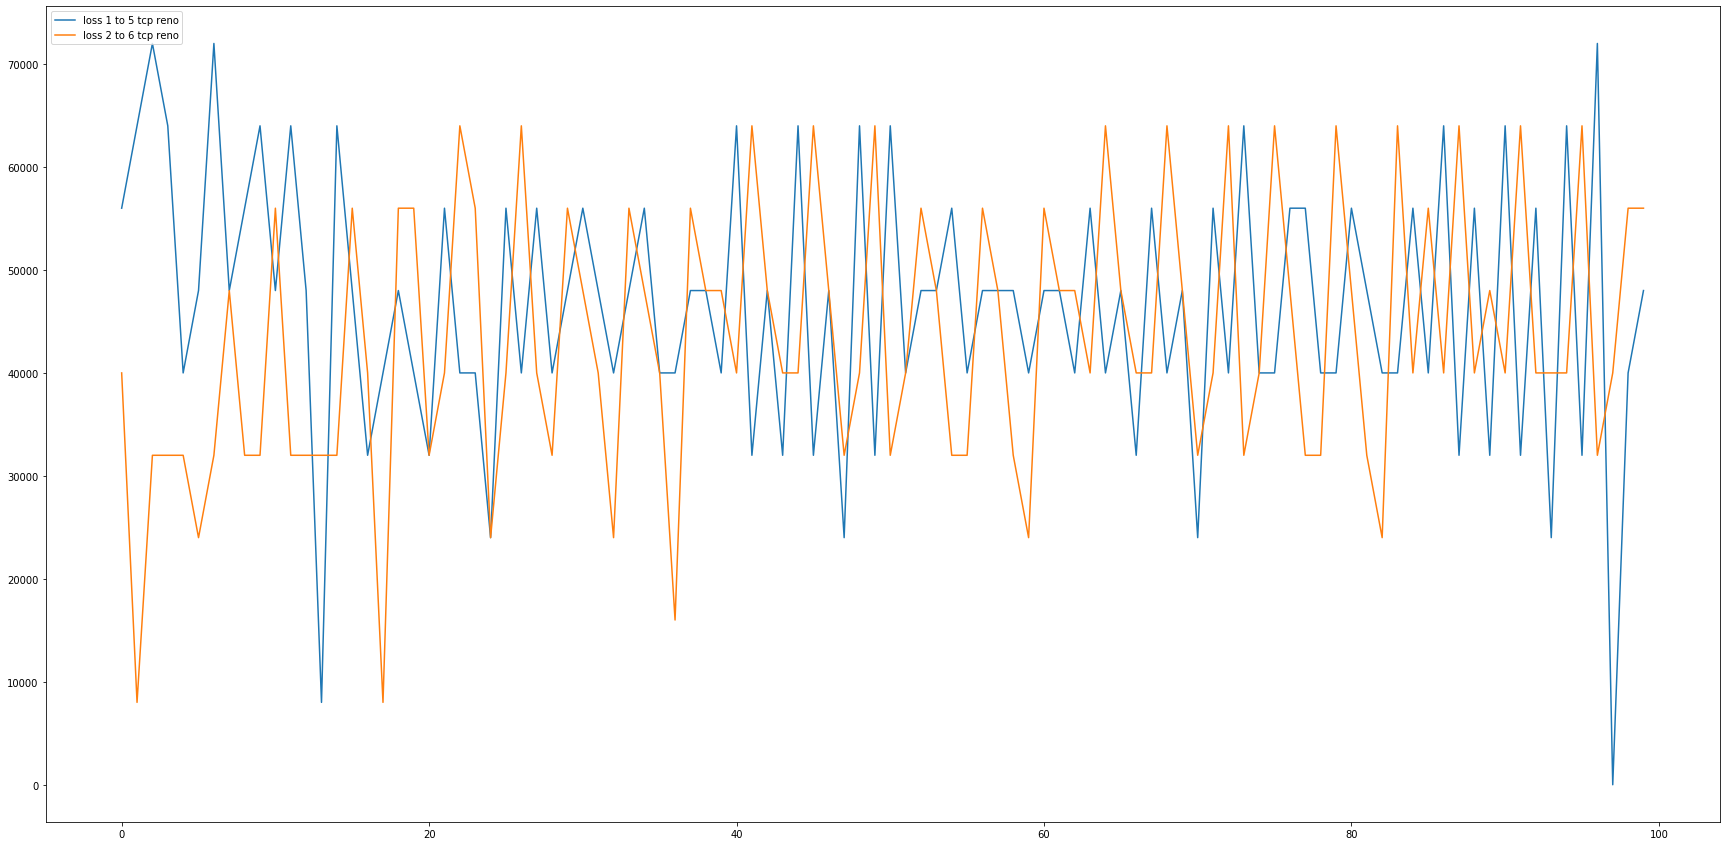

In [12]:
goodput_1 = get_goodput(received_1, drop_1)
goodput_2 = get_goodput(received_2, drop_2)

plt.figure(figsize=(30,15))
plt.plot(np.arange(100), goodput_1)
plt.plot(np.arange(100), goodput_2)
plt.legend(['loss 1 to 5 tcp reno', 'loss 2 to 6 tcp reno'], loc='upper left')
plt.show()